In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [2]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/Project/Steven")

In [3]:
df = pd.read_excel('Master Sheet No Formulas.xlsx')

In [4]:
df.head()

,PROVIDER_ID,234_DISCHARGE_COUNT_SUM,234_MEAN_MEDICARE_REIMBURSEMENT,236_DISCHARGE_COUNT_SUM,236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_%,Hospital overall rating,Teach,HSA,HRR,Own_Recode
0,10001,39,22517.230769,23.0,16742.608696,72.0,3.0,0,1026,2,4.0
1,10006,20,23105.850000,15.0,15127.866667,69.0,2.0,0,1036,1,3.0
2,10024,21,22408.571429,31.0,17080.032258,74.0,2.0,0,1059,7,1.0
3,10039,46,26204.608696,79.0,19233.075949,75.0,2.0,0,1051,5,4.0
4,10040,15,21023.666667,16.0,18275.375000,65.0,3.0,0,1039,1,3.0


In [5]:
df.dtypes

PROVIDER_ID                          int64
234_DISCHARGE_COUNT_SUM              int64
234_MEAN_MEDICARE_REIMBURSEMENT    float64
236_DISCHARGE_COUNT_SUM            float64
236_MEAN_MEDICARE_REIMBURSEMENT    float64
HCAHPS_%                           float64
Hospital overall rating            float64
Teach                                int64
HSA                                  int64
HRR                                  int64
Own_Recode                         float64
dtype: object

In [6]:
[sum(df[i].isnull()) for i in df.columns]

[0, 0, 0, 102, 102, 5, 7, 0, 0, 0, 7]

In [7]:
categorical_var = list(set(df.dtypes[df.dtypes == object].index))
numerical_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))
df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(),
                                                inplace = False)
df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(),
                                                inplace = False)
[sum(df[i].isnull()) for i in df.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
df.drop[('PROVIDER_ID'),axis=1]

SyntaxError: invalid syntax (<ipython-input-8-9fe211418e8c>, line 1)

In [9]:
df.describe()

,PROVIDER_ID,234_DISCHARGE_COUNT_SUM,234_MEAN_MEDICARE_REIMBURSEMENT,236_DISCHARGE_COUNT_SUM,236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_%,Hospital overall rating,Teach,HSA,HRR,Own_Recode
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,264643.310078,23.189922,30269.398181,31.996124,23263.518137,72.096899,3.315891,0.104651,26421.009690,252.670543,1.569767
std,154109.584382,12.404931,6476.389420,20.833226,4583.897100,6.373360,1.084319,0.306400,15178.443094,123.874459,1.048798
min,10001.000000,11.000000,18307.583333,11.000000,14514.066667,49.000000,1.000000,0.000000,1011.000000,1.000000,1.000000
25%,117542.750000,14.000000,25810.357165,19.000000,20591.981712,69.000000,3.000000,0.000000,11782.000000,147.750000,1.000000
50%,260030.000000,20.000000,28675.472528,26.000000,22292.736216,72.000000,3.000000,0.000000,26030.500000,269.000000,1.000000
75%,390066.250000,28.000000,33171.579004,36.000000,24520.418181,76.000000,4.000000,0.000000,39055.500000,352.750000,1.000000
max,670088.000000,97.000000,71582.272727,162.000000,50800.741176,94.000000,5.000000,1.000000,53003.000000,457.000000,4.000000


In [10]:
corr = df.corr()
display(corr)

,PROVIDER_ID,234_DISCHARGE_COUNT_SUM,234_MEAN_MEDICARE_REIMBURSEMENT,236_DISCHARGE_COUNT_SUM,236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_%,Hospital overall rating,Teach,HSA,HRR,Own_Recode
PROVIDER_ID,1.000000,0.036992,-0.088275,0.071851,-0.053100,0.145134,0.129690,0.037568,0.992622,0.937912,-0.107042
234_DISCHARGE_COUNT_SUM,0.036992,1.000000,-0.080988,0.470858,-0.026364,0.118024,0.001738,0.028478,0.040763,0.055202,0.014054
234_MEAN_MEDICARE_REIMBURSEMENT,-0.088275,-0.080988,1.000000,0.085059,0.835196,-0.100327,0.018345,0.424548,-0.087834,-0.102195,-0.095484
236_DISCHARGE_COUNT_SUM,0.071851,0.470858,0.085059,1.000000,0.110129,0.273911,0.129849,0.201134,0.061517,0.067148,0.020807
236_MEAN_MEDICARE_REIMBURSEMENT,-0.053100,-0.026364,0.835196,0.110129,1.000000,-0.053492,0.048049,0.453968,-0.051904,-0.053864,-0.127241
HCAHPS_%,0.145134,0.118024,-0.100327,0.273911,-0.053492,1.000000,0.565379,0.000763,0.129721,0.140255,-0.118662
Hospital overall rating,0.129690,0.001738,0.018345,0.129849,0.048049,0.565379,1.000000,0.052261,0.118541,0.129147,-0.199551
Teach,0.037568,0.028478,0.424548,0.201134,0.453968,0.000763,0.052261,1.000000,0.040023,0.048386,-0.077146
HSA,0.992622,0.040763,-0.087834,0.061517,-0.051904,0.129721,0.118541,0.040023,1.000000,0.945040,-0.110700
HRR,0.937912,0.055202,-0.102195,0.067148,-0.053864,0.140255,0.129147,0.048386,0.945040,1.000000,-0.111393


<AxesSubplot:>

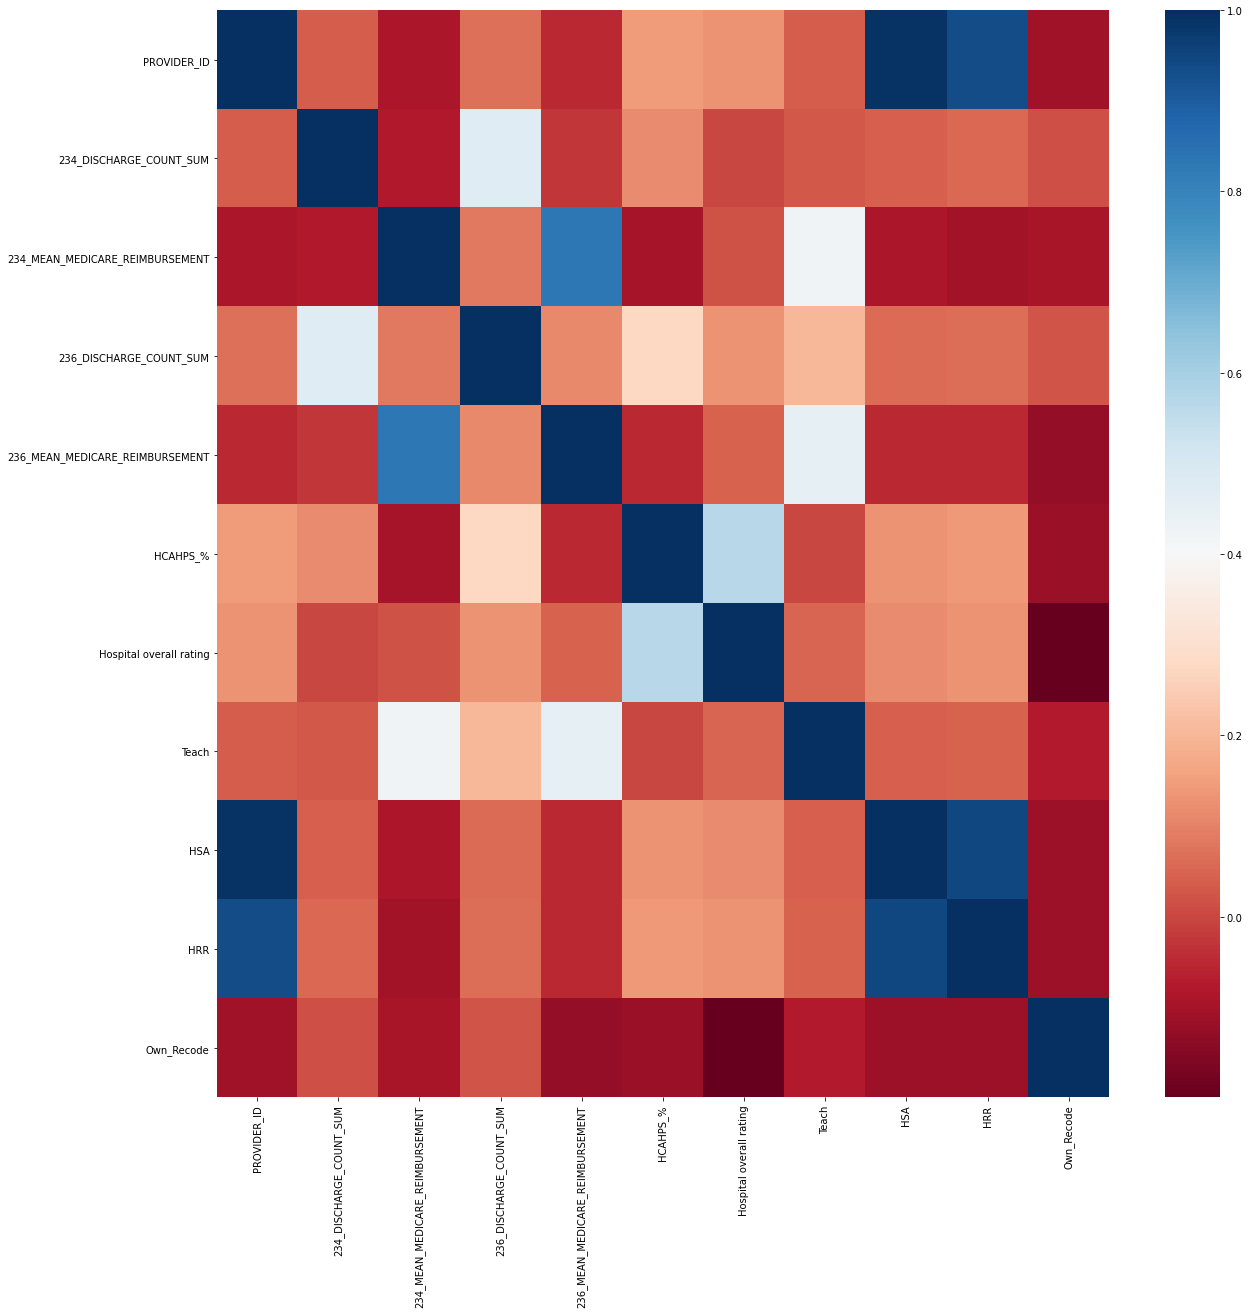

In [11]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

In [12]:
df_before = df
df_after = df.drop(['PROVIDER_ID','HSA','HRR'], axis=1)



X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)


series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)


print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                              217.971660
PROVIDER_ID                         70.205990
234_DISCHARGE_COUNT_SUM              1.330671
234_MEAN_MEDICARE_REIMBURSEMENT      3.460053
236_DISCHARGE_COUNT_SUM              1.470871
236_MEAN_MEDICARE_REIMBURSEMENT      3.492558
HCAHPS_%                             1.623508
Hospital overall rating              1.533976
Teach                                1.323269
HSA                                 78.690053
HRR                                  9.494272
Own_Recode                           1.075192
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                              212.573980
234_DISCHARGE_COUNT_SUM              1.320799
234_MEAN_MEDICARE_REIMBURSEMENT      3.417488
236_DISCHARGE_COUNT_SUM              1.458411
236_MEAN_MEDICARE_REIMBURSEMENT      3.485037
HCAHPS_%                             1.608290
Hospital overall rating              1.527488
Teach                                1.312960
Own_Recode                           1.063531
dtype: float64

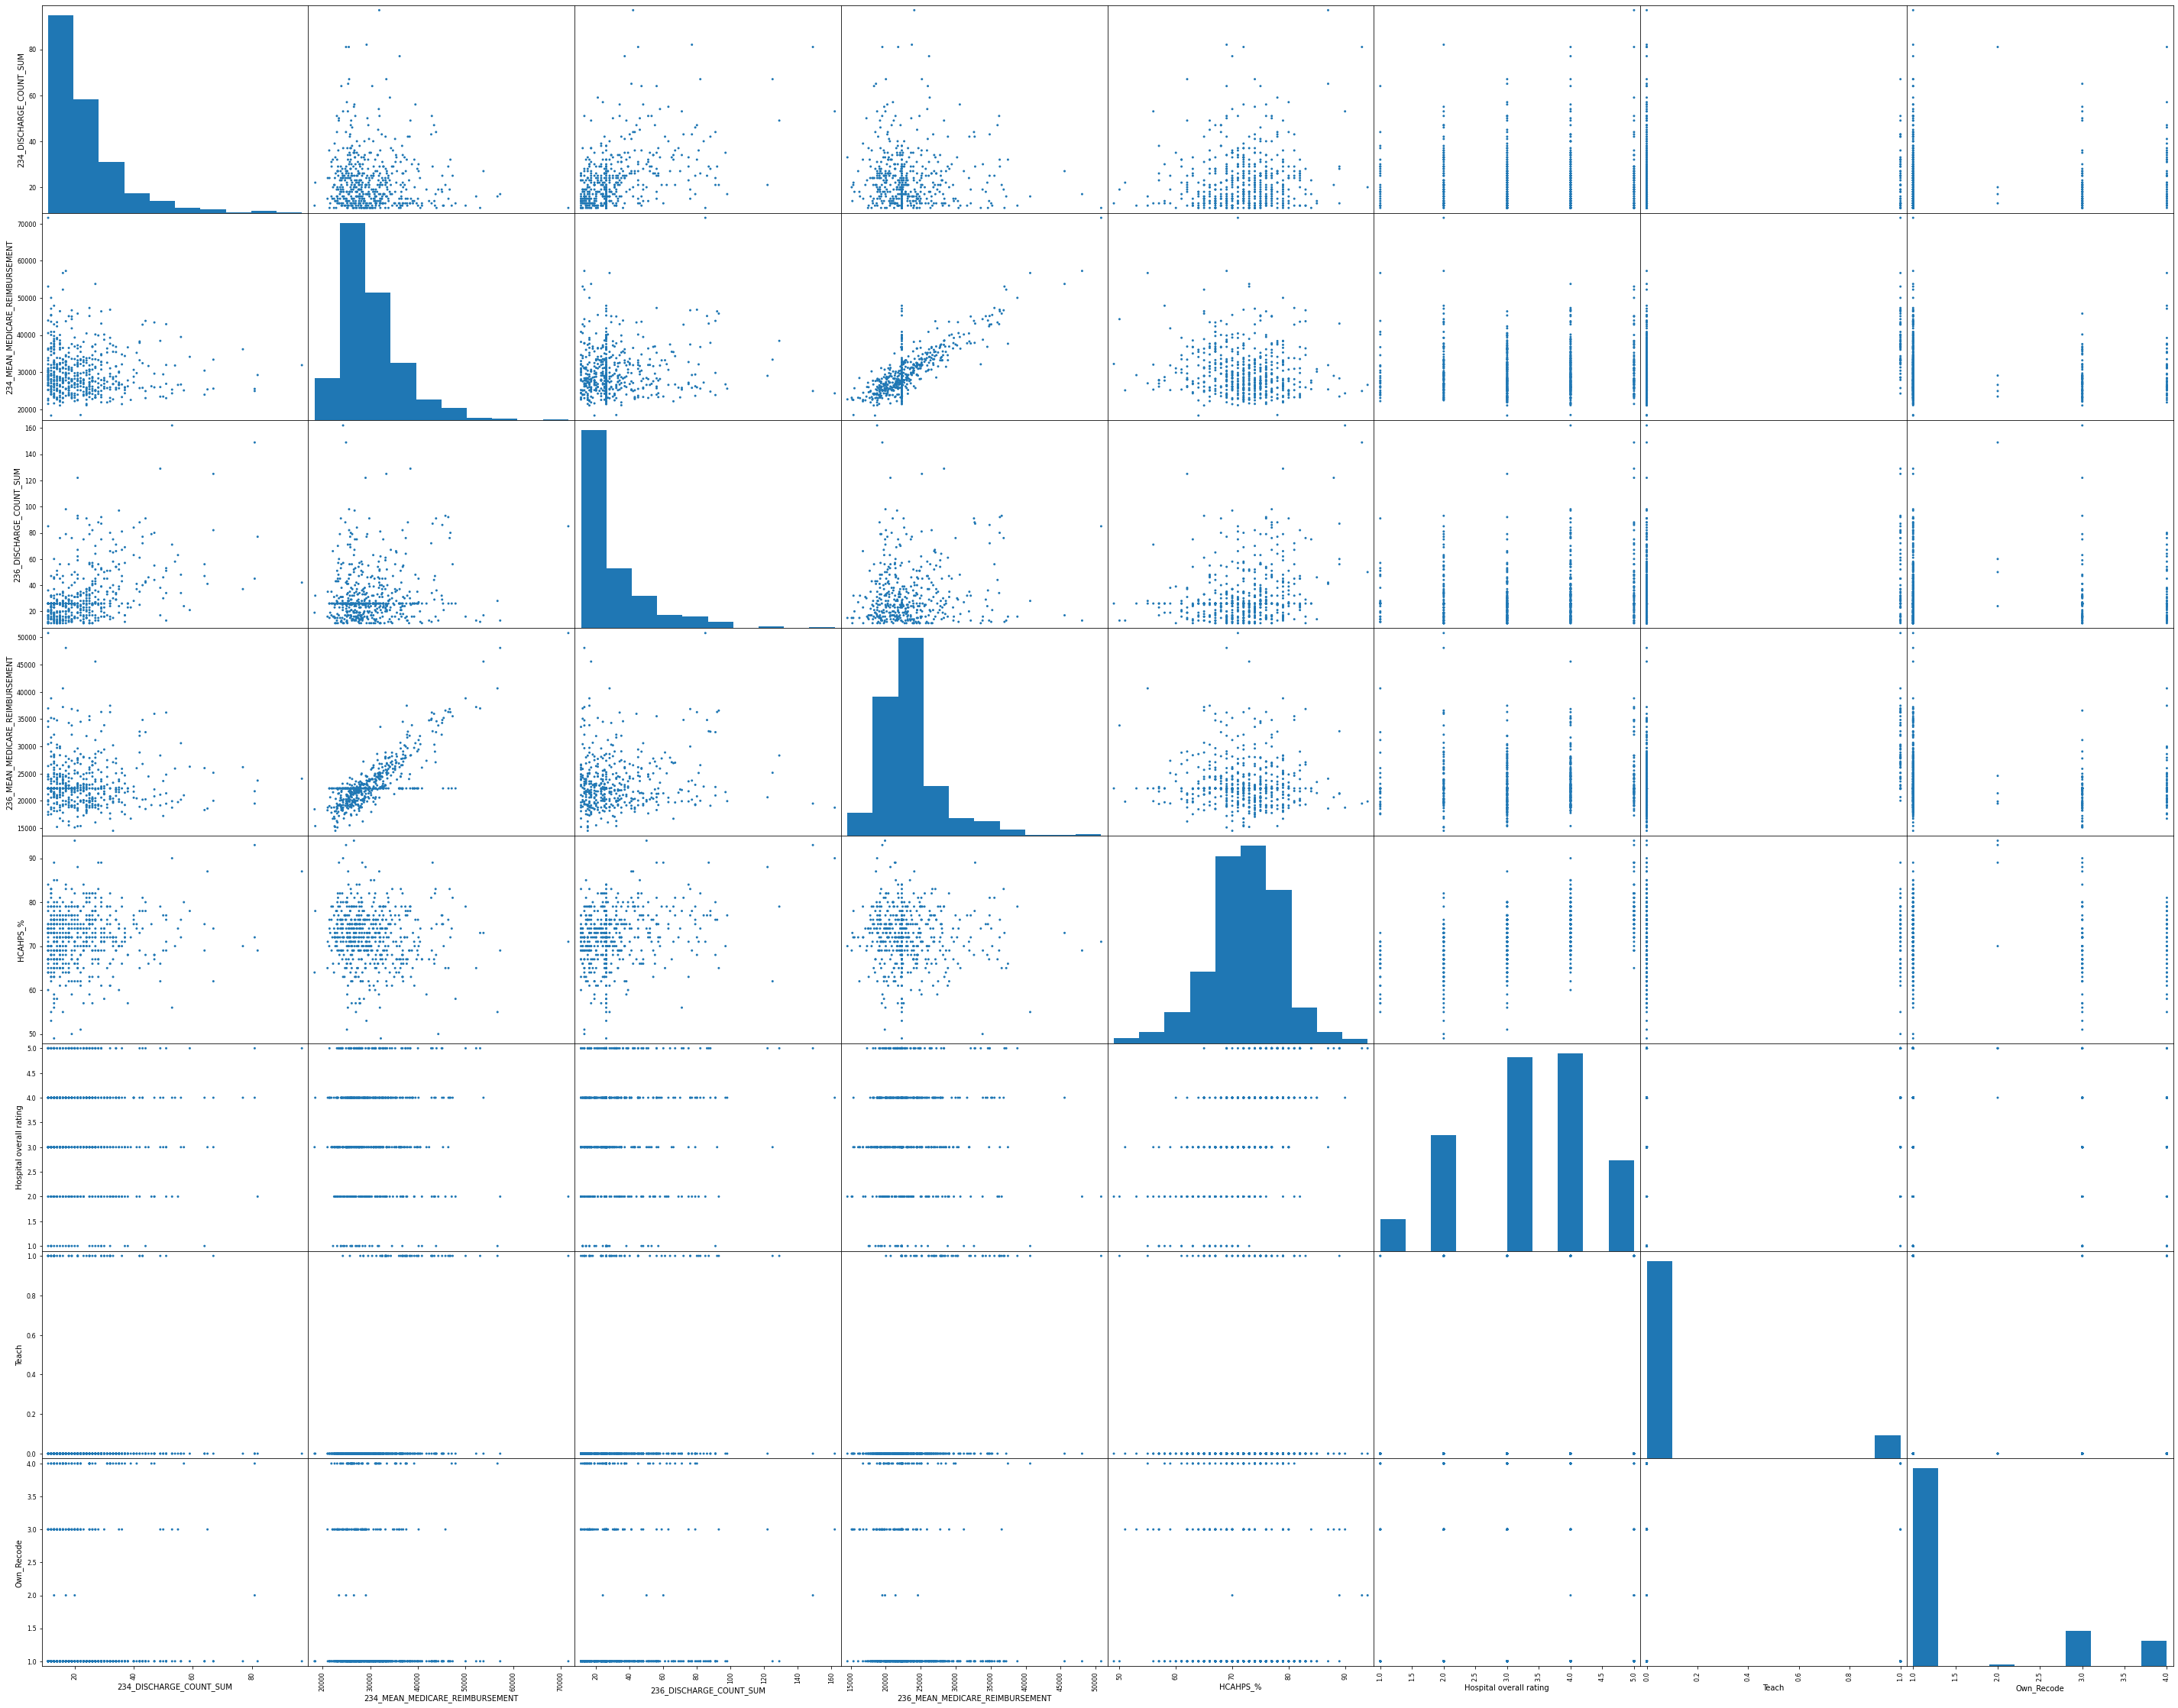

In [13]:
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (50, 40))

# show the plot
plt.show()

## Check variables skew and kurtosis 

In [14]:
df_after.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
234_DISCHARGE_COUNT_SUM,2.053022,5.976626
234_MEAN_MEDICARE_REIMBURSEMENT,1.590412,4.418004
236_DISCHARGE_COUNT_SUM,2.276384,7.096809
236_MEAN_MEDICARE_REIMBURSEMENT,1.926069,5.971973
HCAHPS_%,-0.225585,1.033459
Hospital overall rating,-0.212671,-0.651310
Teach,2.590643,4.729751
Own_Recode,1.436660,0.357001


In [16]:
df_dummies = pd.get_dummies(df_after, prefix='', prefix_sep='', 
                            columns=['Teach', 'Hospital overall rating'])
df_dummies.head()

,234_DISCHARGE_COUNT_SUM,234_MEAN_MEDICARE_REIMBURSEMENT,236_DISCHARGE_COUNT_SUM,236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_%,Own_Recode,0,1,1.0,2.0,3.0,4.0,5.0
0,39,22517.230769,23.0,16742.608696,72.0,4.0,1,0,0,0,1,0,0
1,20,23105.850000,15.0,15127.866667,69.0,3.0,1,0,0,1,0,0,0
2,21,22408.571429,31.0,17080.032258,74.0,1.0,1,0,0,1,0,0,0
3,46,26204.608696,79.0,19233.075949,75.0,4.0,1,0,0,1,0,0,0
4,15,21023.666667,16.0,18275.375000,65.0,3.0,1,0,0,0,1,0,0


In [18]:
df123 = pd.get_dummies(df_after,columns=['Teach','Own_Recode'])

In [19]:
df123

,234_DISCHARGE_COUNT_SUM,234_MEAN_MEDICARE_REIMBURSEMENT,236_DISCHARGE_COUNT_SUM,236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_%,Hospital overall rating,Teach_0,Teach_1,Own_Recode_1.0,Own_Recode_2.0,Own_Recode_3.0,Own_Recode_4.0
0,39,22517.230769,23.0,16742.608696,72.0,3.0,1,0,0,0,0,1
1,20,23105.850000,15.0,15127.866667,69.0,2.0,1,0,0,0,1,0
2,21,22408.571429,31.0,17080.032258,74.0,2.0,1,0,1,0,0,0
3,46,26204.608696,79.0,19233.075949,75.0,2.0,1,0,0,0,0,1
4,15,21023.666667,16.0,18275.375000,65.0,3.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
511,17,25417.647059,26.0,22292.736216,84.0,5.0,1,0,1,0,0,0
512,11,36367.363636,21.0,24476.476190,67.0,3.0,1,0,0,0,0,1
513,11,27729.000000,26.0,22292.736216,84.0,4.0,1,0,1,0,0,0
514,21,29011.285714,122.0,20661.049180,88.0,5.0,1,0,0,0,1,0


In [20]:
df123.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
234_DISCHARGE_COUNT_SUM,2.053022,5.976626
234_MEAN_MEDICARE_REIMBURSEMENT,1.590412,4.418004
236_DISCHARGE_COUNT_SUM,2.276384,7.096809
236_MEAN_MEDICARE_REIMBURSEMENT,1.926069,5.971973
HCAHPS_%,-0.225585,1.033459
Hospital overall rating,-0.212671,-0.651310
Teach_0,-2.590643,4.729751
Teach_1,2.590643,4.729751
Own_Recode_1.0,-1.219119,-0.515762
Own_Recode_2.0,11.258074,125.229595


In [21]:
df123.to_csv('df123.csv')

In [22]:
hf = pd.read_csv('scaled123.csv')

In [23]:
hf

,Unnamed: 0,X234_DISCHARGE_COUNT_SUM,X234_MEAN_MEDICARE_REIMBURSEMENT,X236_DISCHARGE_COUNT_SUM,X236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_.,Hospital.overall.rating,Teach_0,Teach_1,Own_Recode_1.0,Own_Recode_2.0,Own_Recode_3.0,Own_Recode_4.0
0,1,1.274499,-1.196989,-0.431816,-1.422569,-0.015204,-0.291327,0.34155,-0.34155,-1.776278,-0.088303,-0.395786,3.049908
1,2,-0.257150,-1.106102,-0.815818,-1.774833,-0.485913,-1.213565,0.34155,-0.34155,-1.776278,-0.088303,2.521722,-0.327243
2,3,-0.176536,-1.213767,-0.047814,-1.348958,0.298602,-1.213565,0.34155,-0.34155,0.561884,-0.088303,-0.395786,-0.327243
3,4,1.838791,-0.627632,2.256198,-0.879261,0.455506,-1.213565,0.34155,-0.34155,-1.776278,-0.088303,-0.395786,3.049908
4,5,-0.660215,-1.427606,-0.767818,-1.088188,-1.113526,-0.291327,0.34155,-0.34155,-1.776278,-0.088303,2.521722,-0.327243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,512,-0.498989,-0.749144,-0.287815,-0.211781,1.867634,1.553149,0.34155,-0.34155,0.561884,-0.088303,-0.395786,-0.327243
512,513,-0.982668,0.941569,-0.527817,0.264613,-0.799719,-0.291327,0.34155,-0.34155,-1.776278,-0.088303,-0.395786,3.049908
513,514,-0.982668,-0.392255,-0.287815,-0.211781,1.867634,0.630911,0.34155,-0.34155,0.561884,-0.088303,-0.395786,-0.327243
514,515,-0.176536,-0.194261,4.320208,-0.567742,2.495246,1.553149,0.34155,-0.34155,-1.776278,-0.088303,2.521722,-0.327243


In [24]:
# get the summary
desc_df = hf.describe()


# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Unnamed: 0,X234_DISCHARGE_COUNT_SUM,X234_MEAN_MEDICARE_REIMBURSEMENT,X236_DISCHARGE_COUNT_SUM,X236_MEAN_MEDICARE_REIMBURSEMENT,HCAHPS_.,Hospital.overall.rating,Teach_0,Teach_1,Own_Recode_1.0,Own_Recode_2.0,Own_Recode_3.0,Own_Recode_4.0
count,516.000000,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02,5.160000e+02
mean,258.500000,-2.162353e-17,-3.227393e-18,-1.749247e-16,2.969201e-17,-1.014262e-15,-1.015983e-15,-4.656052e-16,-1.063103e-15,-8.778508e-17,8.886087e-17,-7.562856e-17,4.559230e-16
std,149.100637,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-9.826675e-01,-1.846988e+00,-1.007819e+00,-1.908736e+00,-3.623975e+00,-2.135803e+00,-2.922152e+00,-3.415503e-01,-1.776278e+00,-8.830266e-02,-3.957859e-01,-3.272433e-01
25%,129.750000,-7.408282e-01,-6.885072e-01,-6.238172e-01,-5.828090e-01,-4.859131e-01,-2.913272e-01,3.415503e-01,-3.415503e-01,5.618839e-01,-8.830266e-02,-3.957859e-01,-3.272433e-01
50%,258.500000,-2.571496e-01,-2.461133e-01,-2.878154e-01,-2.117809e-01,-1.520379e-02,-2.913272e-01,3.415503e-01,-3.415503e-01,5.618839e-01,-8.830266e-02,-3.957859e-01,-3.272433e-01
75%,387.250000,3.877553e-01,4.481171e-01,1.921870e-01,2.741990e-01,6.124086e-01,6.309110e-01,3.415503e-01,-3.415503e-01,5.618839e-01,-8.830266e-02,-3.957859e-01,-3.272433e-01
max,516.000000,5.950060e+00,6.378998e+00,6.240218e+00,6.007382e+00,3.436665e+00,1.553149e+00,3.415503e-01,2.922152e+00,5.618839e-01,1.130274e+01,2.521722e+00,3.049908e+00
+3_std,705.801911,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
-3_std,-188.801911,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00


In [99]:
hf = hf.drop(['Hospital.overall.rating'],axis=1)
hf

,X234_MEAN_MEDICARE_REIMBURSEMENT,X236_DISCHARGE_COUNT_SUM,X236_MEAN_MEDICARE_REIMBURSEMENT,Teach_0,Teach_1,Own_Recode_1.0
0,-1.196989,-0.431816,-1.422569,0.34155,-0.34155,-1.776278
1,-1.106102,-0.815818,-1.774833,0.34155,-0.34155,-1.776278
2,-1.213767,-0.047814,-1.348958,0.34155,-0.34155,0.561884
3,-0.627632,2.256198,-0.879261,0.34155,-0.34155,-1.776278
4,-1.427606,-0.767818,-1.088188,0.34155,-0.34155,-1.776278
...,...,...,...,...,...,...
511,-0.749144,-0.287815,-0.211781,0.34155,-0.34155,0.561884
512,0.941569,-0.527817,0.264613,0.34155,-0.34155,-1.776278
513,-0.392255,-0.287815,-0.211781,0.34155,-0.34155,0.561884
514,-0.194261,4.320208,-0.567742,0.34155,-0.34155,-1.776278


In [100]:
# filter the data frame to remove the values exceeding 3 standard deviations
new_remove_hf = hf[(np.abs(stats.zscore(hf)) < 3).all(axis=1)]

# what rows were removed
hf.index.difference(new_remove_hf.index)

Int64Index([32, 34, 45, 72, 121, 170, 180, 200, 207, 286, 312, 313, 317, 368,
            514],
           dtype='int64')

In [101]:
X = new_remove_hf.drop('X236_MEAN_MEDICARE_REIMBURSEMENT', axis = 1) 
Y = new_remove_hf[['X236_MEAN_MEDICARE_REIMBURSEMENT']]

In [102]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [103]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.003248
----------------------------------------------------------------------------------------------------
The Coefficient for X234_MEAN_MEDICARE_REIMBURSEMENT is 0.73
The Coefficient for X236_DISCHARGE_COUNT_SUM is 0.072
The Coefficient for Teach_0 is -0.055
The Coefficient for Teach_1 is 0.055
The Coefficient for Own_Recode_1.0 is 0.067


In [104]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[-0.42645796],
       [-0.88523672],
       [ 1.16372225],
       [ 0.25769075],
       [ 0.48566116]])

In [105]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [106]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.307
MAE 0.406
RMSE 0.554


In [107]:
# estimate the p-values
est.pvalues

const                               5.250932e-01
X234_MEAN_MEDICARE_REIMBURSEMENT    1.629993e-87
X236_DISCHARGE_COUNT_SUM            1.418846e-02
Teach_0                             1.018125e-05
Teach_1                             1.018125e-05
Own_Recode_1.0                      1.307410e-02
dtype: float64

In [111]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.41


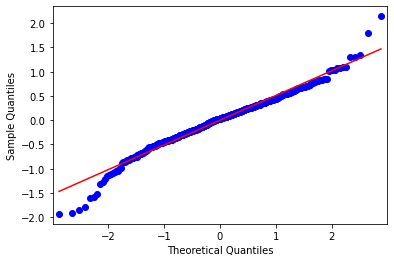

The mean of the residuals is 1.392e-16


In [109]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [110]:
print(est.summary())

                                   OLS Regression Results                                   
Dep. Variable:     X236_MEAN_MEDICARE_REIMBURSEMENT   R-squared:                       0.644
Model:                                          OLS   Adj. R-squared:                  0.641
Method:                               Least Squares   F-statistic:                     224.3
Date:                              Wed, 08 Sep 2021   Prob (F-statistic):          9.15e-110
Time:                                      12:22:57   Log-Likelihood:                -373.73
No. Observations:                               501   AIC:                             757.5
Df Residuals:                                   496   BIC:                             778.6
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
                                       coef    std err          t     